<a href="https://colab.research.google.com/github/oshvil2020/Fish/blob/main/fishML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns

In [ ]:
df_fish = pd.read_csv('fish.csv')

In [ ]:
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
lb = LabelEncoder()
df_fish['Species'] = lb.fit_transform(df_fish.Species)

In [ ]:
fish_type = df_fish['Species'].unique()

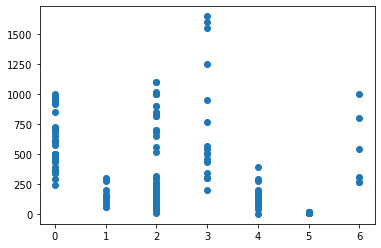

In [ ]:
plt.scatter(df_fish['Species'], df_fish['Weight'] )

<AxesSubplot:xlabel='Species', ylabel='Height'>

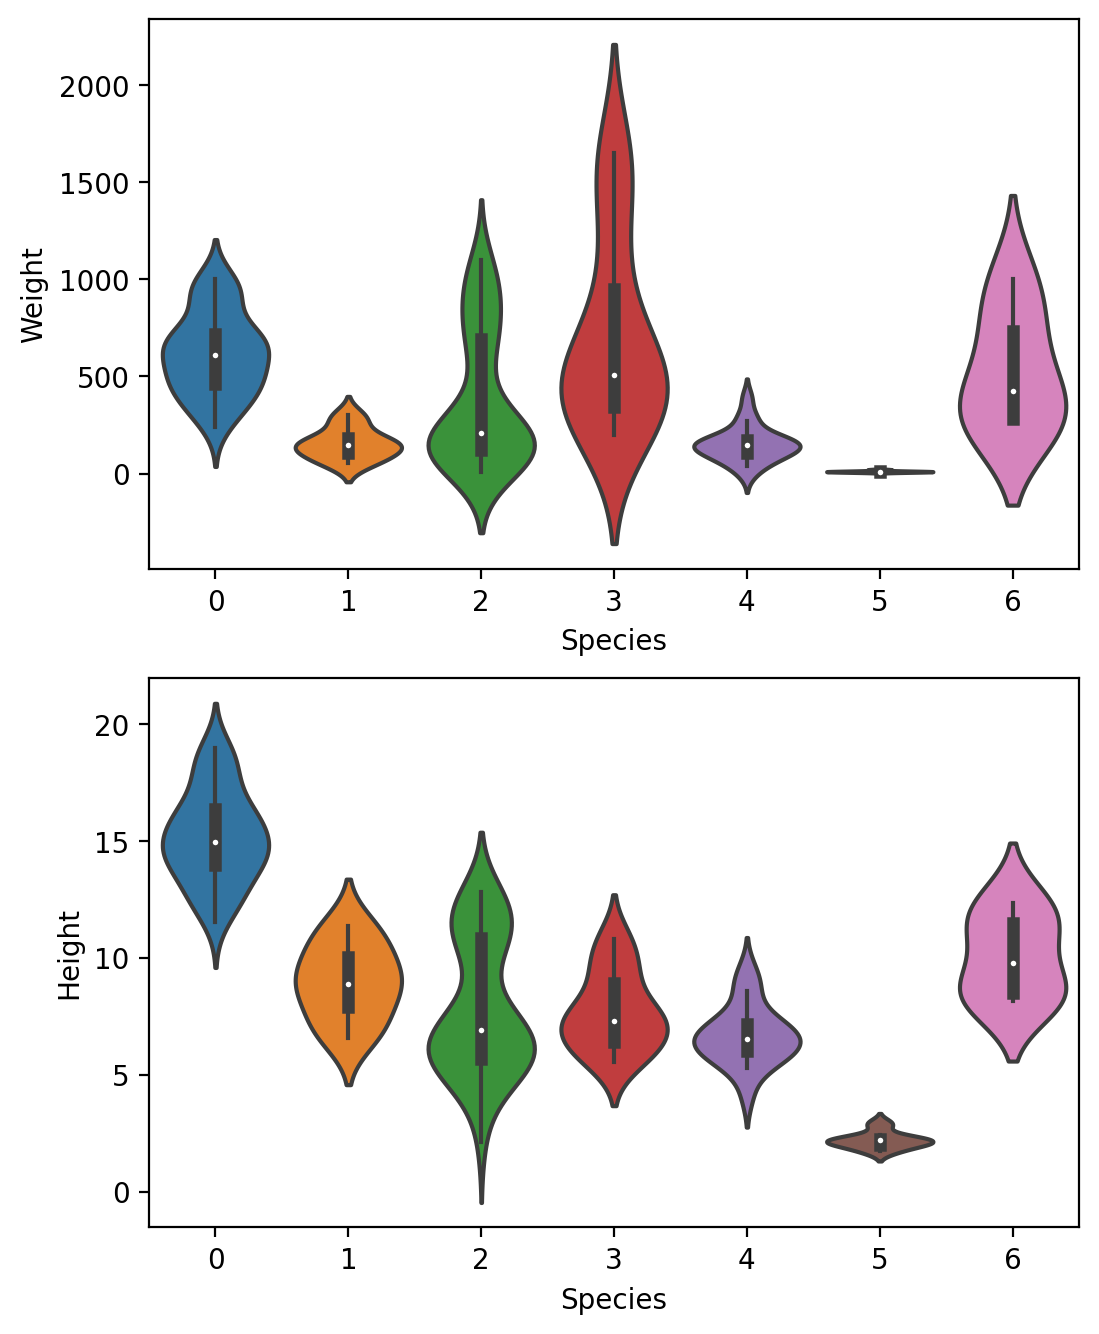

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8), dpi=200)
sns.violinplot(x="Species", y="Weight", data=df_fish, scale='width', ax=ax[0])
sns.violinplot(x="Species", y="Height", data=df_fish, scale='width', ax=ax[1])


In [ ]:
# plt.scatter(df_fish[df_fish['Species']=='Bream'], df_fish['Weight'] )

In [ ]:
feature= df_fish[['Height']]

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(feature,df_fish['Species'])

LinearRegression()

In [ ]:
pre = reg.predict(feature)

In [ ]:
pre

array([ 1.55652069,  1.29001486,  1.31838663,  1.2206123 ,  1.30000883,
        0.97842513,  0.81821626,  1.23726892,  0.86668701,  0.80514082,
        0.79509133,  0.76494285,  0.93489584,  0.89222715,  0.60309608,
        0.46884377,  0.62919145,  0.60764889,  0.41470977,  0.73651557,
        0.55476414,  0.31460352,  0.44533018,  0.4603489 ,  0.24606155,
        0.21288713,  0.21238743,  0.16930232,  0.06586475, -0.50806667,
       -0.25263748, -0.26571293, -0.45176731, -0.41878721, -0.13787341,
        3.60328548,  3.28372833,  3.20674701,  3.19536499,  3.02896541,
        2.95700884,  3.04237399,  3.05711509,  3.14320202,  2.91295209,
        2.8020468 ,  2.93624359,  2.97788513,  2.66296407,  2.83483257,
        2.70116324,  2.78727793,  2.29030008,  2.37602612,  2.12145753,
        2.42810581,  2.49334421,  2.31772797,  1.77194624,  1.4895611 ,
        1.32499375,  2.85365454,  2.92869259,  2.69883131,  2.42483   ,
        2.28585832,  2.38446548,  2.14616485,  2.05166632,  1.88

In [ ]:
reg.coef_

array([-0.27761024])

In [ ]:
reg.intercept_

4.754590666486818

Text(0, 0.5, 'Weight')

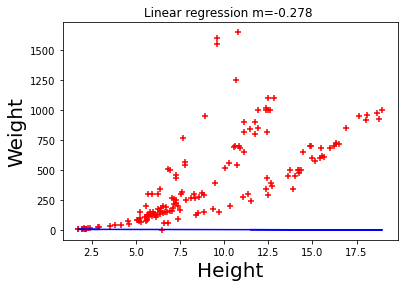

In [ ]:
%matplotlib inline

plt.scatter(feature,df_fish['Weight'],color='red',marker='+')
plt.plot(feature,pre,color='blue')
plt.title(f'Linear regression m={np.round(reg.coef_[0],3)} ')
plt.xlabel('Height', fontsize=20)
plt.ylabel('Weight', fontsize=20)

In [ ]:
(sum(per - df_fish['Weight'])/len(df_fish['Weight']))

-396.0622641509433

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
rmse = (np.sqrt(mean_squared_error(df_fish['Weight'], per)))

In [ ]:
rmse

533.6875793222455

C:\Users\oshvi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


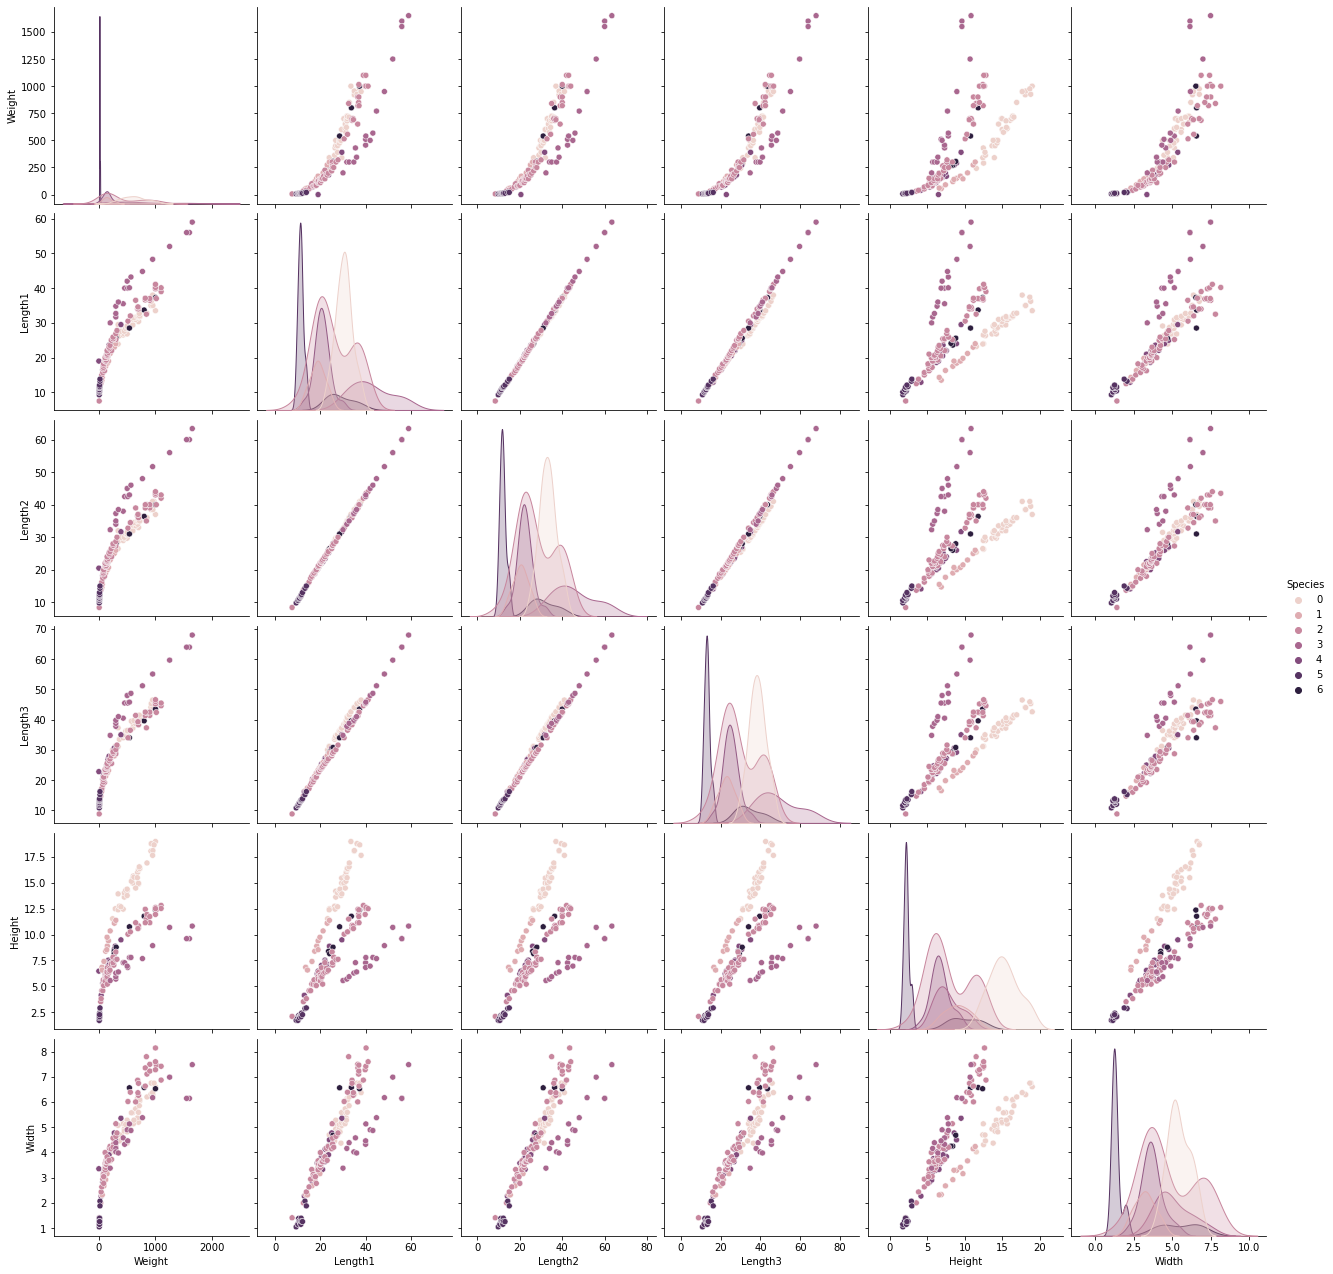

In [ ]:
sns.pairplot(df_fish, hue="Species", size=3, diag_kind="kde");


In [ ]:
# Labels for species

# from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# le = LabelEncoder()
# df_fish['Species'] = le.fit_transform(df_fish.Species)

df_fish.head()

y= df_fish['Species']
x = df_fish.drop('Species',axis=1)


In [ ]:
# Split Train and Test variables

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

from sklearn.metrics import classification_report, accuracy_score


In [ ]:
#KNN

## KNN n_neighbors

from sklearn.neighbors import KNeighborsClassifier
modelKNN1 = KNeighborsClassifier(n_neighbors=40)
modelKNN1.fit(X_train,y_train)

y_predKN1 = modelKNN1.predict(X_test)
print( classification_report(y_test,y_predKN1))
Y_KN1 = accuracy_score(y_test,y_predKN1)


# modelKNN1.predict(np.array([5,3,1,2]).reshape(1,-1))

              precision    recall  f1-score   support

           0       0.57      0.93      0.70        14
           1       0.00      0.00      0.00         3
           2       0.43      0.72      0.54        18
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.49        53
   macro avg       0.14      0.24      0.18        53
weighted avg       0.30      0.49      0.37        53



C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

## KNN raduis

from sklearn.neighbors import RadiusNeighborsClassifier
modelKN2 = RadiusNeighborsClassifier(radius=180)
modelKN2.fit(X_train,y_train)

y_predKN2 = modelKN2.predict(X_test)
print(classification_report(y_test,y_predKN2))
Y_KN2 = accuracy_score(y_test,y_predKN2)

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.00      0.00      0.00         3
           2       0.42      0.83      0.56        18
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.49        53
   macro avg       0.15      0.23      0.18        53
weighted avg       0.31      0.49      0.38        53



C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# DecsionTree

from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train,y_train)

y_predDT = modelDT.predict(X_test)
print( classification_report(y_test,y_predDT))
Y_DT = accuracy_score(y_test,y_predDT)



              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00         3
           2       0.82      0.50      0.62        18
           3       1.00      1.00      1.00         5
           4       0.17      0.50      0.25         4
           5       1.00      1.00      1.00         6
           6       1.00      0.33      0.50         3

    accuracy                           0.75        53
   macro avg       0.85      0.76      0.76        53
weighted avg       0.86      0.75      0.78        53



In [ ]:

# Random Forest

## Random Forest max_depth

from sklearn.ensemble import RandomForestClassifier
modelRF1 = RandomForestClassifier(max_depth=2)
modelRF1.fit(X_train,y_train)

y_predRF1 = modelRF1.predict(X_test)
print(classification_report(y_test,y_predRF1))

Y_RF1= accuracy_score(y_test,y_predRF1)


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.00      0.00      0.00         3
           2       0.59      0.94      0.72        18
           3       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.75        53
   macro avg       0.50      0.52      0.51        53
weighted avg       0.65      0.75      0.69        53



C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Random Forest n_estimators


from sklearn.ensemble import RandomForestClassifier
modelRF2 = RandomForestClassifier(n_estimators= 30)
modelRF2.fit(X_train,y_train)

y_predRF2 = modelRF2.predict(X_test)
print(classification_report(y_test,y_predRF2))
Y_RF2 = accuracy_score(y_test,y_predRF2)


from sklearn.ensemble import RandomForestClassifier
modelRF3 = RandomForestClassifier(n_estimators= 30, min_samples_split=2)
modelRF3.fit(X_train,y_train)

y_predRF3 = modelRF3.predict(X_test)
print(classification_report(y_test,y_predRF3))
Y_RE3 = accuracy_score(y_test,y_predRF3)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         3
           2       0.74      0.78      0.76        18
           3       1.00      1.00      1.00         5
           4       0.17      0.25      0.20         4
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.81        53
   macro avg       0.70      0.72      0.71        53
weighted avg       0.79      0.81      0.80        53

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         3
           2       0.80      0.67      0.73        18
           3       1.00      1.00      1.00         5
           4       0.20      0.50      0.29         4
           5       1.00      1.00      1.00         6
           6       0.00 

C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metr

In [ ]:

# SVM

## SVM kernel = linear

from sklearn.svm import SVC

modelsvm1 = SVC(kernel = 'linear')
modelsvm1.fit(X_train,y_train)

y_predSV1 = modelsvm1.predict(X_test)
print(classification_report(y_test,y_predSV1))
Y_SV1 = accuracy_score(y_test,y_predSV1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         5
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         6
           6       1.00      0.33      0.50         3

    accuracy                           0.96        53
   macro avg       0.95      0.90      0.90        53
weighted avg       0.97      0.96      0.96        53



In [ ]:
## SVM kernel = rbf

from sklearn.svm import SVC

modelsvm2 = SVC(kernel = 'rbf')
modelsvm2.fit(X_train,y_train)

y_predSV2 = modelsvm2.predict(X_test)
print(classification_report(y_test,y_predSV2))
Y_SV2 = accuracy_score(y_test,y_predSV2)


              precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.00      0.00      0.00         3
           2       0.42      0.83      0.56        18
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.49        53
   macro avg       0.15      0.23      0.18        53
weighted avg       0.31      0.49      0.38        53



C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## SVM kernel = sigmoid

from sklearn.svm import SVC

modelsvm3 = SVC(kernel = 'sigmoid')
modelsvm3.fit(X_train,y_train)

y_predSV3 = modelsvm3.predict(X_test)
print(classification_report(y_test,y_predSV3))
Y_SV3 = accuracy_score(y_test,y_predSV3)

              precision    recall  f1-score   support

           0       0.62      0.71      0.67        14
           1       0.00      0.00      0.00         3
           2       0.43      0.67      0.52        18
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.42        53
   macro avg       0.15      0.20      0.17        53
weighted avg       0.31      0.42      0.35        53



C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## SVM kernel = poly

from sklearn.svm import SVC

modelsvm4 = SVC(kernel = 'poly')
modelsvm4.fit(X_train,y_train)

y_predSV4 = modelsvm4.predict(X_test)
print(classification_report(y_test,y_predSV4))
Y_SV4 = accuracy_score(y_test,y_predSV4)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         3
           2       0.34      1.00      0.51        18
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.34        53
   macro avg       0.05      0.14      0.07        53
weighted avg       0.12      0.34      0.17        53



C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Naive Bayes

## NB Gaussian 

from sklearn.naive_bayes import GaussianNB

modelNB1 = GaussianNB()
modelNB1.fit(X_train,y_train)

y_predNB1 = modelNB1.predict(X_test)
Y_NB1 = accuracy_score(y_test,y_predNB1)

print(classification_report(y_test,y_predNB1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.75      1.00      0.86         3
           2       0.33      0.06      0.10        18
           3       0.80      0.80      0.80         5
           4       0.22      1.00      0.36         4
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.58        53
   macro avg       0.57      0.68      0.57        53
weighted avg       0.59      0.58      0.53        53



In [ ]:
## NB Multinomial

from sklearn.naive_bayes import MultinomialNB

modelNB = MultinomialNB(alpha=1.0,fit_prior=True)
modelNB.fit(X_train,y_train)

y_predNB2 = modelNB.predict(X_test)
Y_NB2 = accuracy_score(y_test,y_predNB2)

print(classification_report(y_test,y_predNB2))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.00      0.00      0.00         3
           2       0.14      0.06      0.08        18
           3       0.25      0.20      0.22         5
           4       0.20      1.00      0.33         4
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.47        53
   macro avg       0.35      0.45      0.36        53
weighted avg       0.43      0.47      0.42        53



C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oshvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

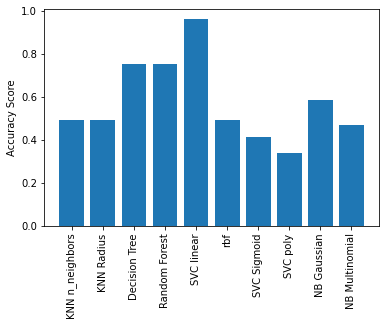

In [ ]:
x=['KNN n_neighbors','KNN Radius','Decision Tree','Random Forest','SVC linear', 'rbf' , 'SVC Sigmoid' , 'SVC poly','NB Gaussian' , 'NB Multinomial']
y = [Y_KN1, Y_KN2, Y_DT, Y_RF1, Y_SV1, Y_SV2 , Y_SV3 , Y_SV4, Y_NB1 , Y_NB2]
plt.bar(x, y)#, width=0.8), bottom=None, *, align='center', data=None, **kwargs)
plt.ylabel('Accuracy Score')
plt.xticks(rotation = 90)